<a href="https://colab.research.google.com/github/developer0hye/Torch-Warmup/blob/main/warmup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch-ignite

1e-05
0.00012
0.00023
0.00034
0.00045000000000000004
0.00056
0.00067
0.0007800000000000001
0.0008900000000000001
0.001
0.0009755282581475768
0.0009045084971874736
0.0007938926261462366
0.0006545084971874737
0.0005
0.00034549150281252633
0.0002061073738537635
9.549150281252634e-05
2.4471741852423235e-05
0.0


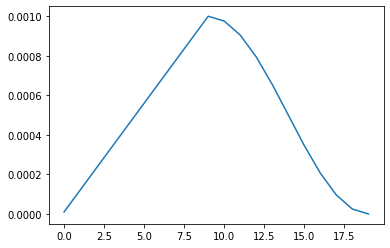

In [18]:
import torchvision.models as models
import torch.optim as optim
from ignite.handlers.param_scheduler import create_lr_scheduler_with_warmup 
import matplotlib.pyplot as plt

model = models.resnet18()

total_iteration = 20
warmup_iteration = 10
initial_lr = 1e-3
warmup_initial_lr = 1e-5

optimizer = optim.Adam(model.parameters(), lr=initial_lr)
lr_scheduler = create_lr_scheduler_with_warmup(optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=total_iteration-warmup_iteration),
                                               warmup_start_value=warmup_initial_lr,
                                               warmup_duration=warmup_iteration,
                                               warmup_end_value=initial_lr)

x = []
y = []

for i in range(total_iteration):
  lr_scheduler(None)
  x.append(i)
  y.append(optimizer.param_groups[0]['lr'])
  print(optimizer.param_groups[0]['lr'])

plt.plot(x, y)
plt.show()